In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum, to_date, date_format

In [2]:
# Crear una sesión de Spark
spark = SparkSession.builder.appName("VentasPorDia").getOrCreate()

24/12/20 13:53:31 WARN Utils: Your hostname, marco-pc resolves to a loopback address: 127.0.1.1; using 192.168.1.100 instead (on interface wlp0s20f3)
24/12/20 13:53:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/20 13:53:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# Leer el archivo CSV
df = spark.read.csv("ticket.csv", header=True, inferSchema=True)

In [4]:
# Convertir la columna created_at a formato de fecha
df = df.withColumn("created_at", to_date(col("created_at"), "yyyy-MM-dd"))

In [5]:
# Extraer el día de la semana de la columna created_at
df = df.withColumn("dia_semana", date_format(col("created_at"), "EEEE"))

In [6]:
# Agrupar por día de la semana y sumar los totales
ventas_por_dia_semana = df.groupBy("dia_semana").agg(_sum("total").alias("total_ventas"))

In [7]:
# Ordenar por total de ventas en orden descendente
ventas_ordenadas = ventas_por_dia_semana.orderBy(col("total_ventas").desc()).collect()
print(ventas_ordenadas)

[Row(dia_semana='Monday', total_ventas=4713), Row(dia_semana='Wednesday', total_ventas=4241), Row(dia_semana='Friday', total_ventas=4148), Row(dia_semana='Tuesday', total_ventas=3795), Row(dia_semana='Thursday', total_ventas=2944), Row(dia_semana='Saturday', total_ventas=2382), Row(dia_semana='Sunday', total_ventas=688)]


In [8]:
# Importar las bibliotecas necesarias, incluyendo Matplotlib y otras bibliotecas relevantes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [9]:
# Imprimir los días de la semana ordenados por ventas
# print("Lista de los mejores días de la semana en ventas:")
# for i, row in enumerate(ventas_ordenadas, start=1):
#     # print(f"{i}. {row['dia_semana']} con un total de ventas de: {row['total_ventas']}")
#     print(f"{i}. {row.dia_semana}")
#     plt.figure(figsize=(10, 6))
#     plt.bar(row.dia_semana, row.total_ventas, color='blue')
#     plt.xlabel('Día de la semana')
#     plt.ylabel('Total de ventas')
#     plt.title('Ventas por día de la semana')
#     plt.show()

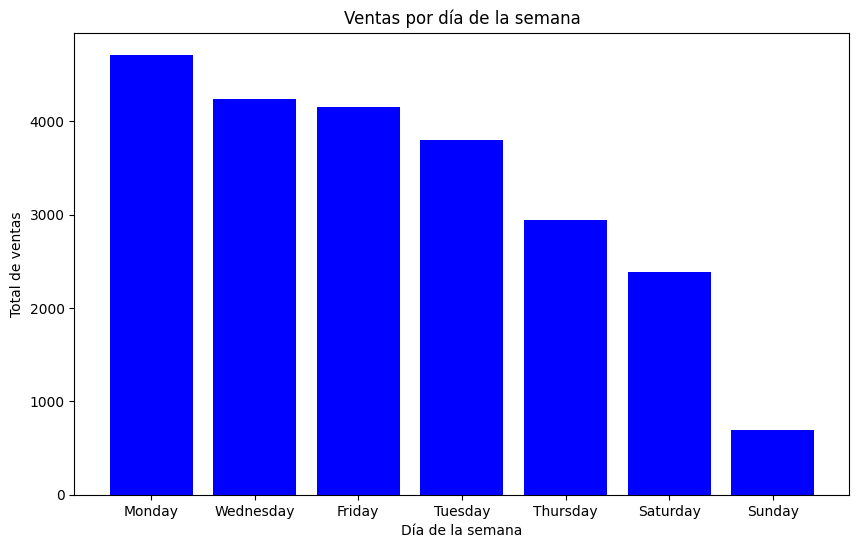

In [10]:
plt.figure(figsize=(10, 6))
plt.bar([row.dia_semana for row in ventas_ordenadas], [row.total_ventas for row in ventas_ordenadas], color='blue')
plt.xlabel('Día de la semana')
plt.ylabel('Total de ventas')
plt.title('Ventas por día de la semana')
plt.show()